In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import os.path

from rikabtools.plot_utils import cmaps
from labellines import labelLine, labelLines
from tqdm import tqdm


mpl.rcParams['font.family']="serif"
mpl.rcParams['mathtext.fontset']="cm"

/tmp/ipykernel_45550/4148078680.py:9: RuntimeWarning: overflow encountered in exp
  return term_1 * term_2 * lz * (np.exp(1/lz) - 1) * (np.exp(-2/lz)) * (-np.exp(-3/lz) + 1)
/tmp/ipykernel_45550/4148078680.py:9: RuntimeWarning: invalid value encountered in multiply
  return term_1 * term_2 * lz * (np.exp(1/lz) - 1) * (np.exp(-2/lz)) * (-np.exp(-3/lz) + 1)


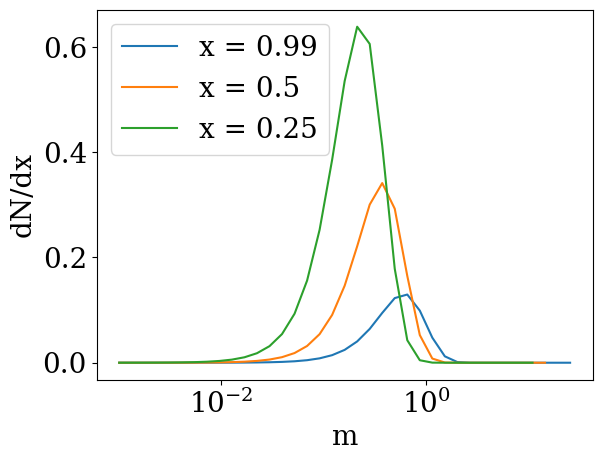

In [20]:
def f(x, m):

    term_1 = 1  / (m**2 *(1-x)/x + x)
    term_2 = 1.0 -x  + x**2/3

    lz = x  / m**2


    return term_1 * term_2 * lz * (np.exp(1/lz) - 1) * (np.exp(-2/lz)) * (-np.exp(-3/lz) + 1)


m = np.logspace(-3, 3)
plt.plot(m, f(0.99, m), label = "x = 0.99")
plt.plot(m, f(0.5, m), label = "x = 0.5")
plt.plot(m, f(0.25, m), label = "x = 0.25")
plt.xlabel("m")
plt.ylabel("dN/dx")
plt.xscale("log")
plt.legend()

/home/rikab/miniconda3/envs/SHAPER/lib/python3.8/site-packages/labellines/core.py:151: UserWarning: Tried to label line Line2D(_child5), but could not find a label for it.
  warnings.warn(


1.3101294863398425
4.006954581040633
33.362296557410886
163.0407320531529
271.59676054006974


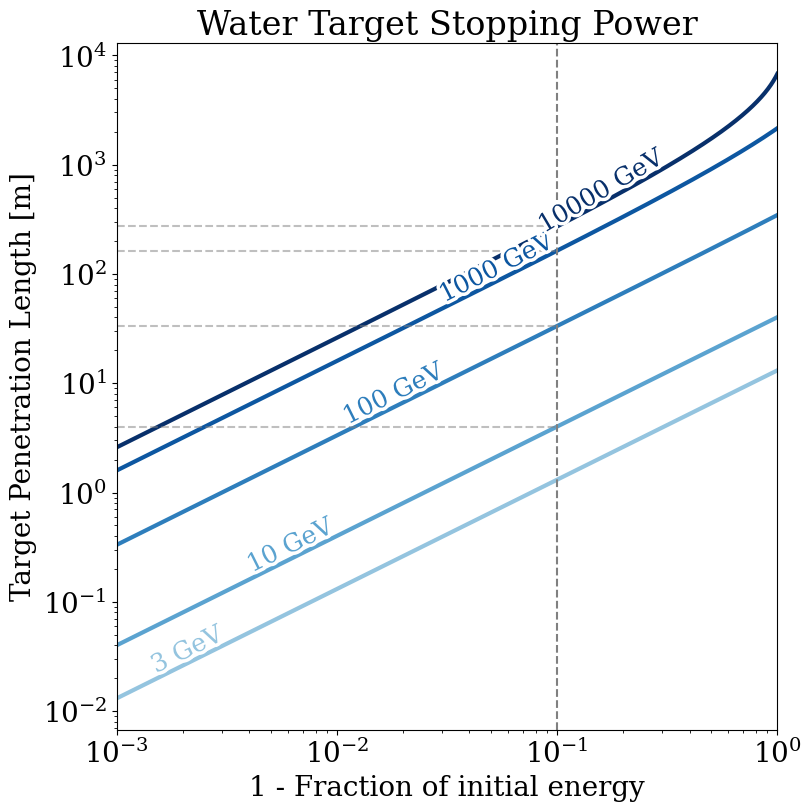

In [21]:
def length(fraction, a, b, E0):
    E = E0 * 1000
    return 0.01* np.log((a + b*E)/(a + fraction*b*E))/ b

plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))

x = np.linspace(0,1,1000)

# 5 shades of blue, not too light
colors = cm.Blues(np.linspace(0.4, 1, 5))

a_3, b_3 = 2.287 , 1e-6 
a_10, b_10 = 2.482 , 1.4380e-6 
a_100, b_100 = 2.781 , 2.278e-6 
a_1000, b_1000 = 3.325 , 2.9575e-6 
a_10000, b_10000 = 3.634 , 3.4961e-6 

l3 = length(0.9, a_3, b_3, 3)
l10 = length(0.9, a_10, b_10, 10)
l100 = length(0.9, a_100, b_100, 100)
l1000 = length(0.9, a_1000, b_1000, 1000)
l10000 = length(0.9, a_10000, b_10000, 10000)

plt.plot(x, length(1 - x, a_3, b_3, 3), label = "3 GeV", lw = 3, color = colors[0])
plt.plot(x, length(1 - x, a_10, b_10, 10), label = "10 GeV", lw = 3, color = colors[1])
plt.plot(x, length(1 - x, a_100, b_100, 100), label = "100 GeV", lw = 3, color = colors[2])
plt.plot(x, length(1 - x, a_1000, b_1000, 1000), label = "1000 GeV", lw = 3, color = colors[3])
plt.plot(x, length(1 - x, a_10000, b_10000, 10000), label = "10000 GeV", lw = 3, color = colors[4])

plt.axvline(0.1, color = "grey", ls = "--")
plt.hlines([l10, l100, l1000, l10000], 1e-3, 0.1, color = "grey", alpha = 0.5, ls = "--")

plt.xlabel("1 - Fraction of initial energy")
plt.ylabel("Target Penetration Length [m]")


# plt.legend(title = "Initial Energy", frameon = False)
plt.xscale("log")
plt.yscale("log")
plt.xlim(1e-3, 1)
labelLines(ax.get_lines(), zorder=20, fontsize = 18, va = "bottom", ha="right", xvals=(1e-3, 1))


plt.title("Water Target Stopping Power")

plt.savefig("tex/Figures/Radiation_Lengths/water_lengths.pdf")

print(l3)
print(l10)
print(l100)
print(l1000)
print(l10000)


/home/rikab/miniconda3/envs/SHAPER/lib/python3.8/site-packages/labellines/core.py:151: UserWarning: Tried to label line Line2D(_child5), but could not find a label for it.
  warnings.warn(


0.18465902688639102
0.5316202476255789
2.917051442969329
5.048098992464496
5.057986524782946


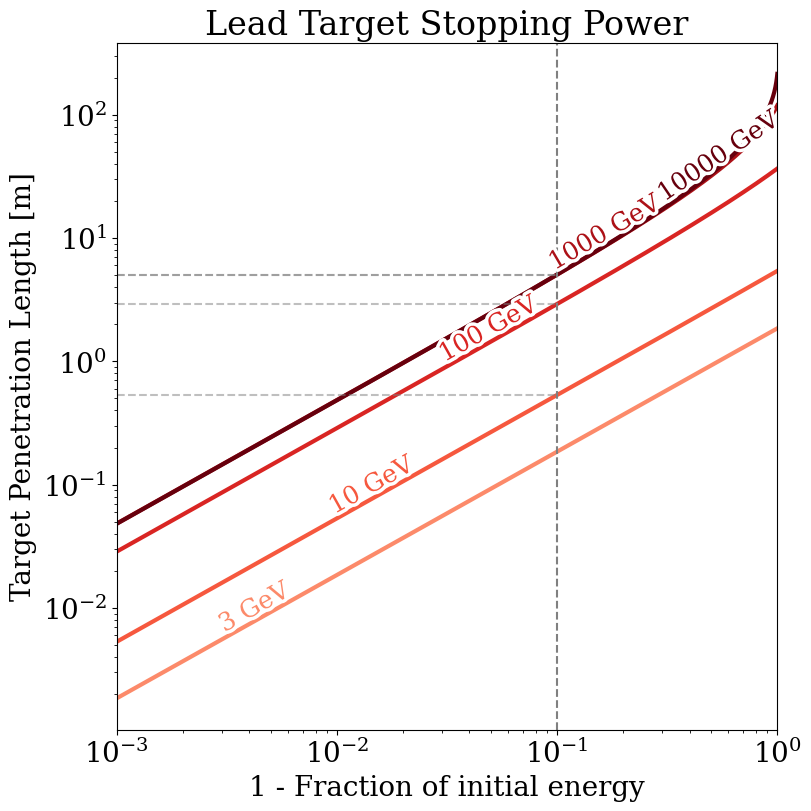

In [22]:
rho = 11.2

def length(fraction, a, b, E0):
    E = E0 * 1000
    return 0.01* np.log((a + b*E)/(a + fraction*b*E))/ b / rho

plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))

# 5 shades of maroon, not too light
colors = cm.Reds(np.linspace(0.4, 1, 5))

x = np.linspace(0,1,1000)

a_3, b_3 = 1.442 , 3e-6 
a_10, b_10 = 1.615 , 6.7899e-6 
a_100, b_100 = 1.860 , 12.6448e-6 
a_1000, b_1000 = 2.051 , 16.4724e-6 
a_10000, b_10000 = 2.251 , 18.3613e-6 

l3 = length(0.9, a_3, b_3, 3)
l10 = length(0.9, a_10, b_10, 10)
l100 = length(0.9, a_100, b_100, 100)
l1000 = length(0.9, a_1000, b_1000, 1000)
l10000 = length(0.9, a_10000, b_10000, 10000)

plt.plot(x, length(1 - x, a_3, b_3, 3), label = "3 GeV", lw = 3, color = colors[0])
plt.plot(x, length(1 - x, a_10, b_10, 10), label = "10 GeV", lw = 3, color = colors[1])
plt.plot(x, length(1 - x, a_100, b_100, 100), label = "100 GeV", lw = 3, color = colors[2])
plt.plot(x, length(1 - x, a_1000, b_1000, 1000), label = "1000 GeV", lw = 3, color = colors[3])
plt.plot(x, length(1 - x, a_10000, b_10000, 10000), label = "10000 GeV", lw = 3, color = colors[4])

plt.axvline(0.1, color = "grey", ls = "--")
plt.hlines([l10, l100, l1000, l10000], 1e-3, 0.1, color = "grey", alpha = 0.5, ls = "--")

plt.xlabel("1 - Fraction of initial energy")
plt.ylabel("Target Penetration Length [m]")


# plt.legend(title = "Initial Energy", frameon = False)
plt.xscale("log")
plt.yscale("log")
plt.xlim(1e-3, 1)
labelLines(ax.get_lines(), zorder=20, fontsize = 18, va = "bottom", ha="left", xvals=(1e-3, 1))


plt.title("Lead Target Stopping Power")

plt.savefig("tex/Figures/Radiation_Lengths/lead_lengths.pdf")


print(l3)
print(l10)
print(l100)
print(l1000)
print(l10000)
